# Binary Classification Problem

*This notebook investigates three binary classification models on the preprocessed version of the WELFake dataset. This dataset contains 15 columns of data on fake and real nws articles. In this notebook we will use the models of logistic regression, k-nearest neighbor and Naive Bayes to classify our problem which is fake news detection. In this data set 0 = Real, 1 = Fake*

## Logistic Regression Model

In [38]:
#Import Pandas
import pandas as pd

col_names = ['title','text','label','language','punctuation_count','uppercase_ratio','numerical_count','sentiment_polarity','processed_title','processed_text','title_len','text_len','total_len','combined_processed_text','combined_text_title']

#Read WELFAKE Dataset

pdata = pd.read_csv('preprocessed_welfake.csv', skiprows=1, names=col_names)

pdata.head(10) #Shows the first 10 lines


,title,text,label,language,punctuation_count,uppercase_ratio,numerical_count,sentiment_polarity,processed_title,processed_text,title_len,text_len,total_len,combined_processed_text,combined_text_title
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,en,182,0.031888,30,0.080000,"['law', 'enforcement', 'high', 'alert', 'follo...","['no_comment', 'expect', 'back', 'drama', 'mem...",130,5049,5179,"['law', 'enforcement', 'high', 'alert', 'follo...",LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,en,2,0.023148,0,0.121875,"['unbelievable', 'drama', 'attorney', 'general...","['demonstrator', 'gather', 'last', 'night', 'e...",137,216,353,"['unbelievable', 'drama', 'attorney', 'general...",UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,en,154,0.030712,34,0.000000,"['bobby', 'final', 'raise', 'hindu', 'us', 'st...","['dozen', 'politically', 'active', 'pastor', '...",105,8010,8115,"['bobby', 'final', 'raise', 'hindu', 'us', 'st...","Bobby Jindal, raised Hindu, uses story of Chri..."
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,en,42,0.064196,70,-0.287879,"['satan', 'russia', 'unvelis', 'image', 'terri...","['rs28', 'format', 'missile', 'dub', 'satan', ...",95,1916,2011,"['satan', 'russia', 'unvelis', 'image', 'terri...",SATAN 2: Russia unvelis an image of its terrif...
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,en,41,0.063399,0,-0.400000,"['time', 'christian', 'group', 'see', 'amazon'...","['say', 'one', 'time', 'someone', 'sue', 'sout...",78,1530,1608,"['time', 'christian', 'group', 'see', 'amazon'...",About Time! Christian Group Sues Amazon and SP...
5,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1,en,2,0.790123,0,0.000000,"['dr', 'ben', 'carson', 'target', 'irs', 'neve...","['dr', 'ben', 'carson', 'tell', 'story', 'happ...",105,81,186,"['dr', 'ben', 'carson', 'target', 'irs', 'neve...",DR BEN CARSON TARGETED BY THE IRS: “I never ha...
6,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1,en,0,0.000000,0,-0.500000,"['house', 'inter', 'chair', 'trumprussia', 'fa...",[],79,1,80,"['house', 'inter', 'chair', 'trumprussia', 'fa...",HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...
7,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1,en,33,0.046560,0,0.087500,"['sport', 'bar', 'owner', 'bank', 'nl', 'games...","['owner', 'ring', 'bar', 'locate', 'south', 'w...",116,1439,1555,"['sport', 'bar', 'owner', 'bank', 'nl', 'games...",Sports Bar Owner Bans NFL Games…Will Show Only...
8,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1,en,90,0.041570,34,0.500000,[],"['file', 'sept', 'file', 'photo', 'marker', 'w...",66,3007,3073,"[]['file', 'sept', 'file', 'photo', 'marker', ...",Latest Pipeline Leak Underscores Dangers Of Da...
9,GOP Senator Just Smacked Down The Most Puncha...,The most punchable Alt-Right Nazi on the inter...,1,en,250,0.055995,121,0.172222,"['go', 'senator', 'smack', 'punchable', 'alrig...","['punchable', 'alright', 'nasi', 'internet', '...",80,4679,4759,"['go', 'senator', 'smack', 'punchable', 'alrig...",GOP Senator Just Smacked Down The Most Puncha...


In [6]:
#sklearn Library Imports
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

#set data and target that would be used to feed the model
feat_col = ['punctuation_count','uppercase_ratio','numerical_count','sentiment_polarity','title_len','text_len','total_len']
X = pdata[feat_col] #The features of the dataset that would be used to establish releationships
y = pdata.label #The target variable which is the true or false value

In [7]:
#splitting the data with a test size of 25% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
#Initializing the logistic regression model with increased max_iter to 500 and random_state to 42
lrmodel = LogisticRegression(max_iter=500,random_state=42)

#Training the model with the train split data
lrmodel.fit(X_train, y_train)

#This does a predicted array on the test data
y_pred = lrmodel.predict(X_test)

y_pred #This prints the predicted array values

array([1, 0, 1, ..., 1, 1, 0], shape=(17885,))

In [9]:
#Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Prints the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6827509085826111
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      8860
           1       0.70      0.64      0.67      9025

    accuracy                           0.68     17885
   macro avg       0.68      0.68      0.68     17885
weighted avg       0.68      0.68      0.68     17885



*The clasification report above states an accuracy of 0.68,real f1-score of 0.69,fake f1-score of 0.67*

In [13]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix #This prints the matrix values

array([[7891,  969],
       [5151, 3874]])

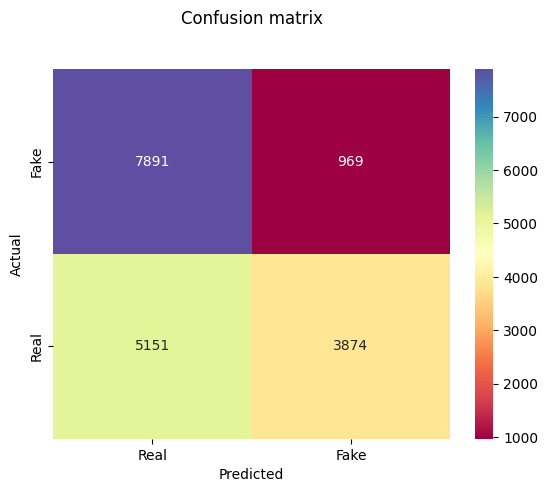

In [14]:
#Imports numpy,matplot and seaborn libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Renders the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=sns.color_palette("Spectral", as_cmap=True) ,fmt='g',xticklabels=['Real', 'Fake'], yticklabels=['Fake', 'Real'])
plt.title('Confusion matrix', y=1.1) #Sets the title, location and distance
plt.ylabel('Actual') #Labels the Y axis as Actual
plt.xlabel('Predicted') #Labels the X axis as Predicted
plt.show()

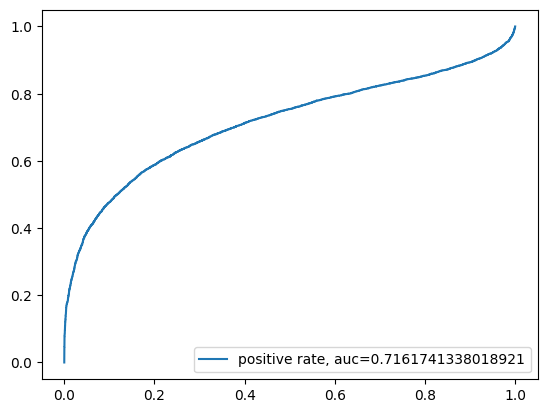

In [15]:
y_pred_proba = lrmodel.predict_proba(X_test)[::,1] #Calculates the probability of positive class 1
falseposrate, trueposrate, _ = metrics.roc_curve(y_test,  y_pred_proba) #Gets the false positive rate and true positive rate
auc = metrics.roc_auc_score(y_test, y_pred_proba) #Calculates AUC scaore
plt.plot(falseposrate,trueposrate,label="positive rate, auc="+str(auc)) #Plots the false postive rate and true positive rate
plt.legend(loc=4) #Sets location of the legend
plt.show()

# Conclusion

*The clasification report for logistic regression showed an accuracy of 0.68,real f1-score of 0.69,fake f1-score of 0.67 and the AUC value for this model was 0.716. This report shows that the logistic model performed moderately well on the current dataset.*

# K-Nearest Neighbor

<Axes: xlabel='total_len', ylabel='uppercase_ratio'>

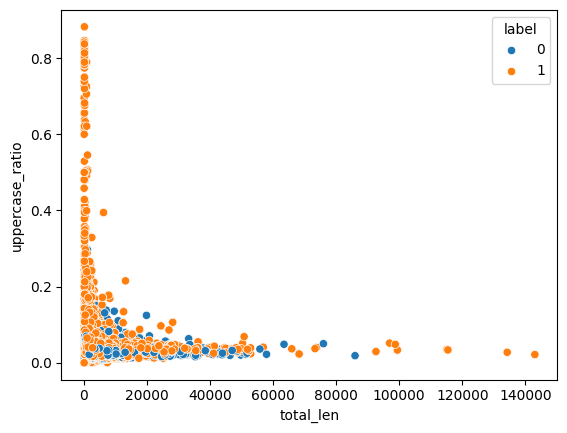

In [84]:
sns.scatterplot(x=pdata['total_len'],y=pdata['uppercase_ratio'], hue=pdata['label'])

<Axes: xlabel='total_len', ylabel='punctuation_count'>

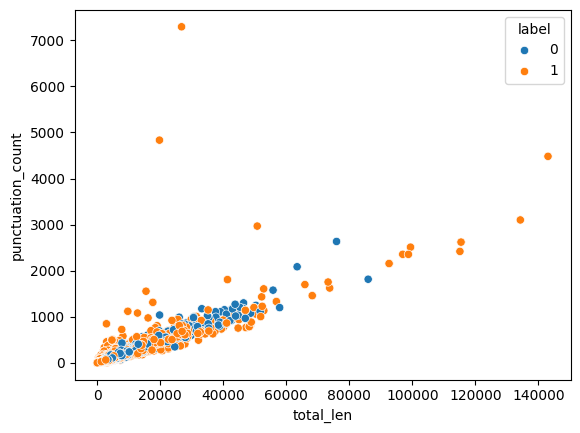

In [85]:
sns.scatterplot(x=pdata['total_len'],y=pdata['punctuation_count'], hue=pdata['label'])

<Axes: xlabel='total_len', ylabel='numerical_count'>

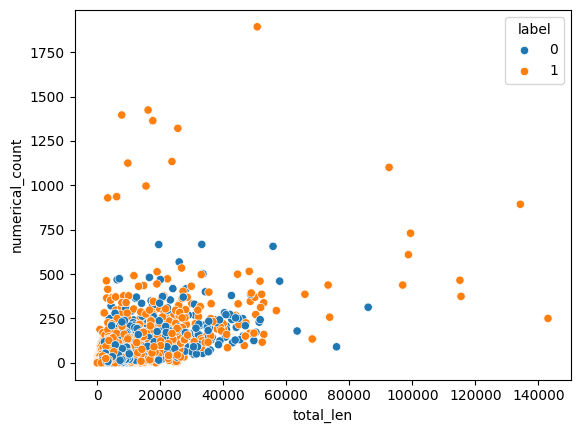

In [86]:
sns.scatterplot(x=pdata['total_len'],y=pdata['numerical_count'], hue=pdata['label'])

<Axes: xlabel='total_len', ylabel='sentiment_polarity'>

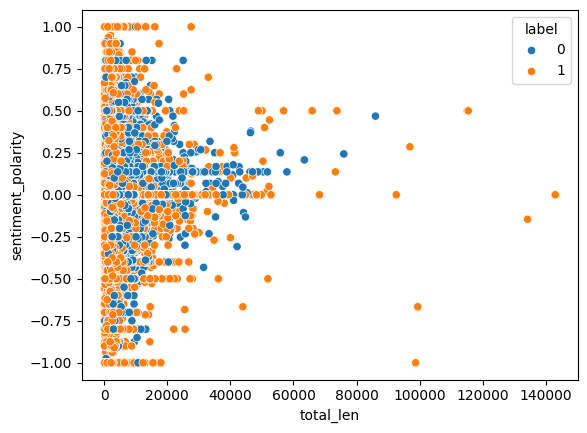

In [87]:
sns.scatterplot(x=pdata['total_len'],y=pdata['sentiment_polarity'], hue=pdata['label'])

In [88]:
from sklearn.neighbors import KNeighborsClassifier

#Initializes the model with n_neighbors = 10
knnmodel = KNeighborsClassifier(n_neighbors=10) 

#Trains the model
knnmodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [89]:
#Gets the predicted values array
y_pred = knnmodel.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1], shape=(17885,))

In [90]:
#Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7761811573944646


In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79      8860
           1       0.82      0.71      0.76      9025

    accuracy                           0.78     17885
   macro avg       0.78      0.78      0.78     17885
weighted avg       0.78      0.78      0.78     17885



*The classification report above states an accuracy of 0.776, a real f1-score of 0.79 and a fake f1-score of 0.76*

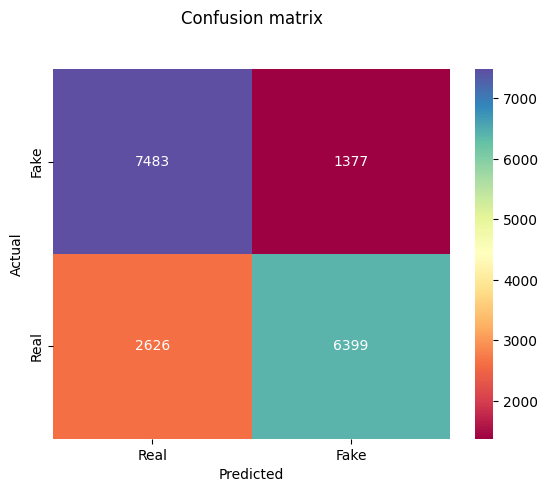

In [92]:
#Calculates the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

#Renders the Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.color_palette("Spectral", as_cmap=True),xticklabels=['Real', 'Fake'], yticklabels=['Fake', 'Real'])
plt.title('Confusion matrix', y=1.1) #Sets the title, location and distance
plt.xlabel('Predicted') #Labels the X axis as Actual
plt.ylabel('Actual') #Labels the Y axis as Predicted
plt.show()

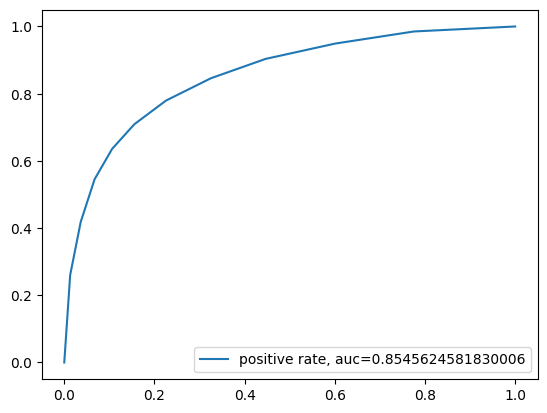

In [93]:
y_pred_proba_k = knn.predict_proba(X_test)[::,1] #Calculates the probability of positive class 1
falseposratek, trueposratek, _ = metrics.roc_curve(y_test,  y_pred_proba_k) #Gets the false positive rate and true positive rate
auc = metrics.roc_auc_score(y_test, y_pred_proba_k) #Calculates AUC scaore
plt.plot(falseposratek,trueposratek,label="positive rate, auc="+str(auc)) #Plots the false postive rate and true positive rate
plt.legend(loc=4) #Sets location of the legend
plt.show()

# Conclusion
*The classification report for K-nearest neighbor showed an accuracy of 0.776, a real f1-score of 0.79 and a fake f1-score of 0.76 and an AUC score of 0.854. This report shows that the K-nearest neighbor model performed well with the current dataset.*

# Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
X = pdata['combined_text_title']  
y = pdata.label

In [26]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [27]:
# Convert text to numerical data using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [29]:
# Train Naïve Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [30]:
print("Accuracy:", accuracy)

Accuracy: 0.8474699468828627


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      8860
           1       0.84      0.87      0.85      9025

    accuracy                           0.85     17885
   macro avg       0.85      0.85      0.85     17885
weighted avg       0.85      0.85      0.85     17885



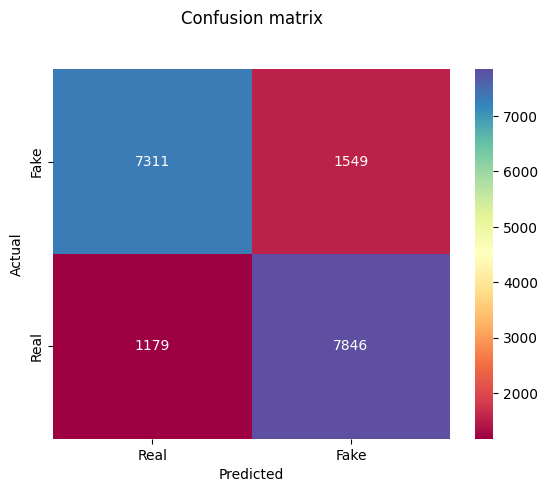

In [32]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.color_palette("Spectral", as_cmap=True),xticklabels=['Real', 'Fake'], yticklabels=['Fake', 'Real'])
plt.title('Confusion matrix', y=1.1) #Sets the title, location and distance
plt.xlabel('Predicted') #Labels the X axis as Actual
plt.ylabel('Actual') #Labels the Y axis as Predicted
plt.show()

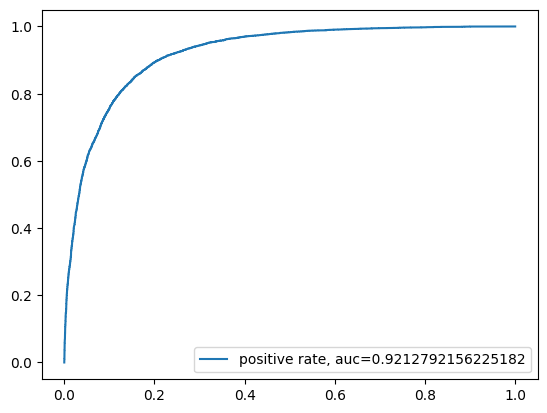

In [35]:
y_pred_proba_nb = nb_classifier.predict_proba(X_test_tfidf)[::,1] #Calculates the probability of positive class 1
falseposratenb, trueposratenb, _ = metrics.roc_curve(y_test,  y_pred_proba_nb) #Gets the false positive rate and true positive rate
auc = metrics.roc_auc_score(y_test, y_pred_proba_nb) #Calculates AUC scaore
plt.plot(falseposratenb,trueposratenb,label="positive rate, auc="+str(auc)) #Plots the false postive rate and true positive rate
plt.legend(loc=4) #Sets location of the legend
plt.show()

### Conclusion


*Labels: 0 - real news 1 - fake news*

*Precision - model predicts "real news" 86% of the time Recall - model correctly identifies "fake news" 84% of the time.*

*The model is performing decent with an overall accuracy of 84.7% in determining between real and fake news. However, there is still a misclassification issue where some false news are labelled as "real news" and similarly for the fake news being labelled as "real news". Therefore, the model does display false negatives and false positives with this classification.
False Negatives: 1549 - times the model identified real news as fake False Positive: 1179 - times the model idenitfied fake news as real*